# Gradient Boosting Machines

* **Ağaçların ürettiği hatalar göz önüne alınarak hatalar üzerine yeni ağaçlar üretir.**

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  #lojistic algoritması
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier  #KNneighbors algoritması
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC #destek vektor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns   #grafik çizmek için
import matplotlib.pyplot as plt #grafik çizmek için

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#veri
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome", axis = 1)
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size = 0.30, random_state = 42)

### Model & Tahmin

In [4]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [6]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7169459962756052

### Model Tuning

In [7]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [9]:
params = {"learning_rate":[0.1, 0.01, 0.002],
         "max_depth":[10, 5, 2, 20],
         "n_estimators":[500, 2000]}

In [10]:
gbm_cv = GridSearchCV(gbm_model, params, cv=10, n_jobs=-1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.4min finished


In [11]:
gbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [16]:
#final
gbm_tuned = GradientBoostingClassifier(n_estimators =500 , max_depth =5 , learning_rate =0.01 ).fit(X_train, y_train)
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7318435754189944

In [23]:
#değişkenlerin önem sırası 
pd.Series(gbm_tuned.feature_importances_, index = X_train.columns)

Pregnancies                 0.096727
Glucose                     0.277821
BloodPressure               0.080286
SkinThickness               0.032906
Insulin                     0.051215
BMI                         0.170965
DiabetesPedigreeFunction    0.179901
Age                         0.110179
dtype: float64

### Değişkenlerin Önem Sırası

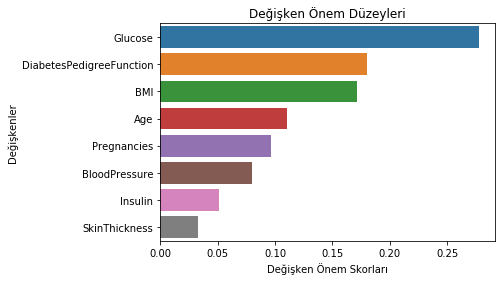

In [17]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

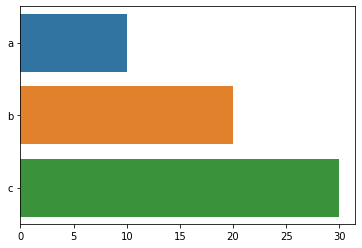

In [14]:
deneme = pd.Series([10, 20, 30], index = ["a", "b", "c"])
sns.barplot(x=deneme, y=deneme.index)